In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline




In [2]:
df = pd.read_csv("D:\\Datasets\\Census Income Data Set\\Census-Income-Prediction-master\\Census-Income-Prediction-master\\adult.csv")

In [3]:
dataset = df.copy()

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.shape

(32561, 15)

In [7]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [9]:
#checking '?' in dataset

value = '?'
result = df.columns[df.isin([value]).any()]

for col in result:
    print(col)

workclass
occupation
native.country


In [10]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [11]:
# Checking for amount of '?' in dataset
col = ['workclass','occupation','native.country']
round((df[col].isin(['?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

workclass         5.64 %
occupation        5.66 %
native.country    1.79 %
dtype: object

# EDA & Preprocessing

In [12]:
#Handling the '?' value in dataset and replacing it with nan

df = df.replace(to_replace = '?', value = np.nan)

In [13]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [14]:
#Checking the value of null values now

def null_missing(d):
    null_values = d.isnull().sum()
    null_values = null_values[null_values>0].sort_values(ascending = False)
    return null_values

null_missing(df)


occupation        1843
workclass         1836
native.country     583
dtype: int64

In [15]:
#filling the null values now we are using mode to fill null values because I find it better and appropriate method to fill values with respect to this dataset.

columns_with_nan = ['workclass','native.country','occupation']

for c in columns_with_nan:
    df[c].fillna(df[c].mode()[0], inplace = True)

In [16]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


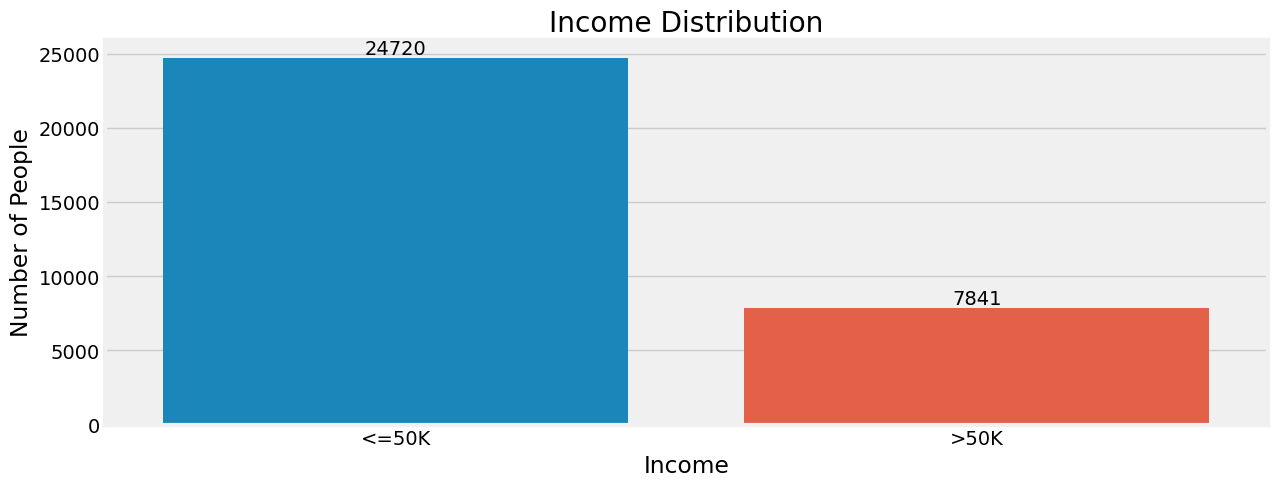

In [17]:
#Income distribution

plt.figure(figsize = (15,5))
plt.style.use('fivethirtyeight')
sns.countplot(data = df, x= df['income'])
counts = df['income'].value_counts().values
for i, count in enumerate(counts):
    plt.annotate(count, xy=(i, count), ha='center', va='bottom')

plt.title('Income Distribution')
plt.xlabel('Income')          
plt.ylabel('Number of People')
plt.show()

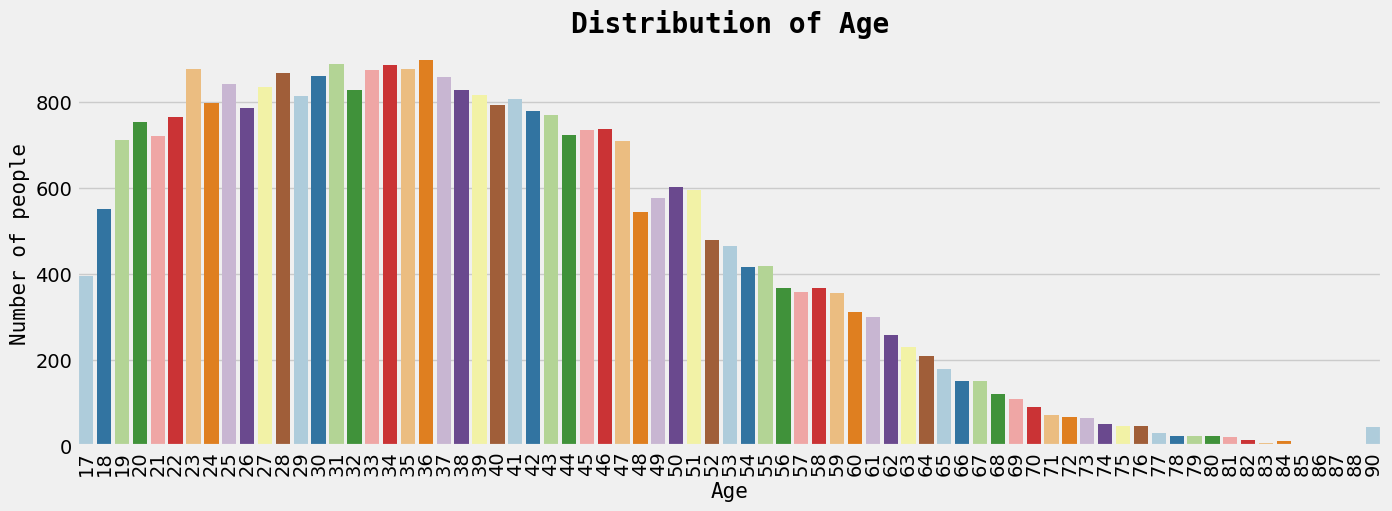

In [18]:
#Creating distribution of age

age =df['age'].value_counts()


plt.figure(figsize =(15,5))
plt.style.use('fivethirtyeight')
sns.barplot(data = df,x = age.index,y = age.values, palette = 'Paired')

plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xticks(rotation = 90)
plt.show();


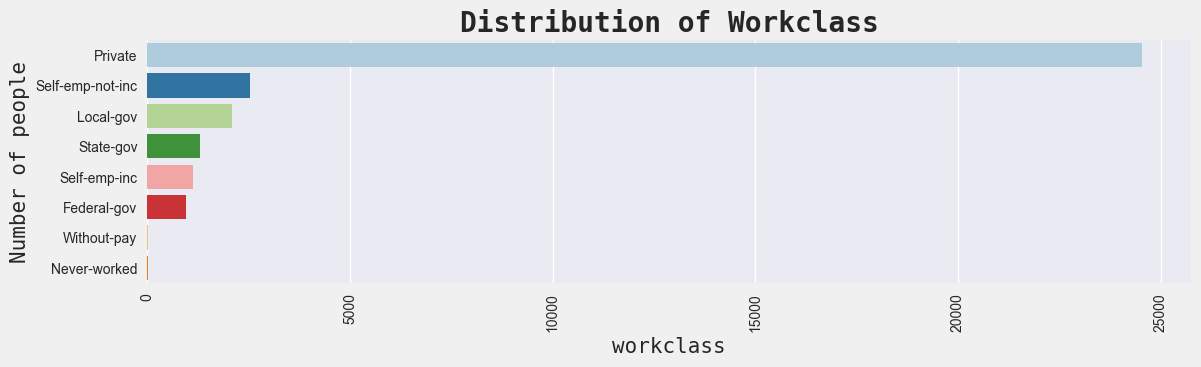

In [19]:
#Creating distribution of workclass


work =df['workclass'].value_counts()


plt.figure(figsize =(12,3))
plt.style.use('seaborn')
sns.barplot(data = df,x = work.values,y = work.index, palette = 'Paired')

plt.title('Distribution of Workclass', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('workclass', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xticks(rotation = 90)
plt.show();


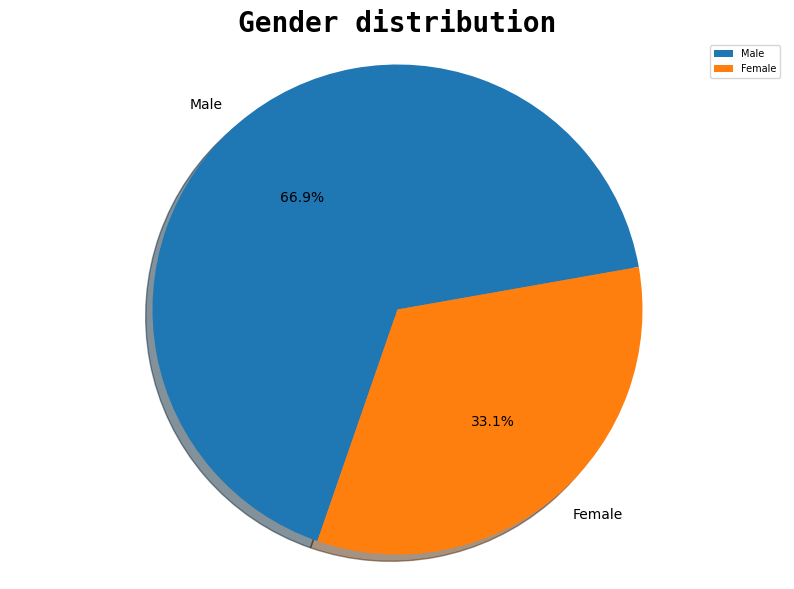

In [20]:
# Creating a pie chart for 'Gender'
Gender = df['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(Gender.values, labels=Gender.index, startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('Gender distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

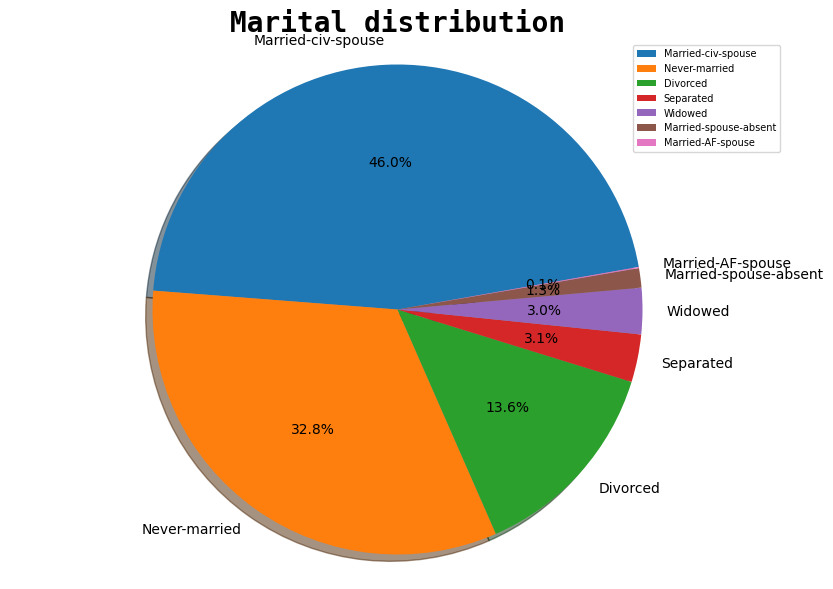

In [21]:
# Creating a pie chart for 'marital.status'
Marital = df['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(Marital.values, labels=Marital.index, startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

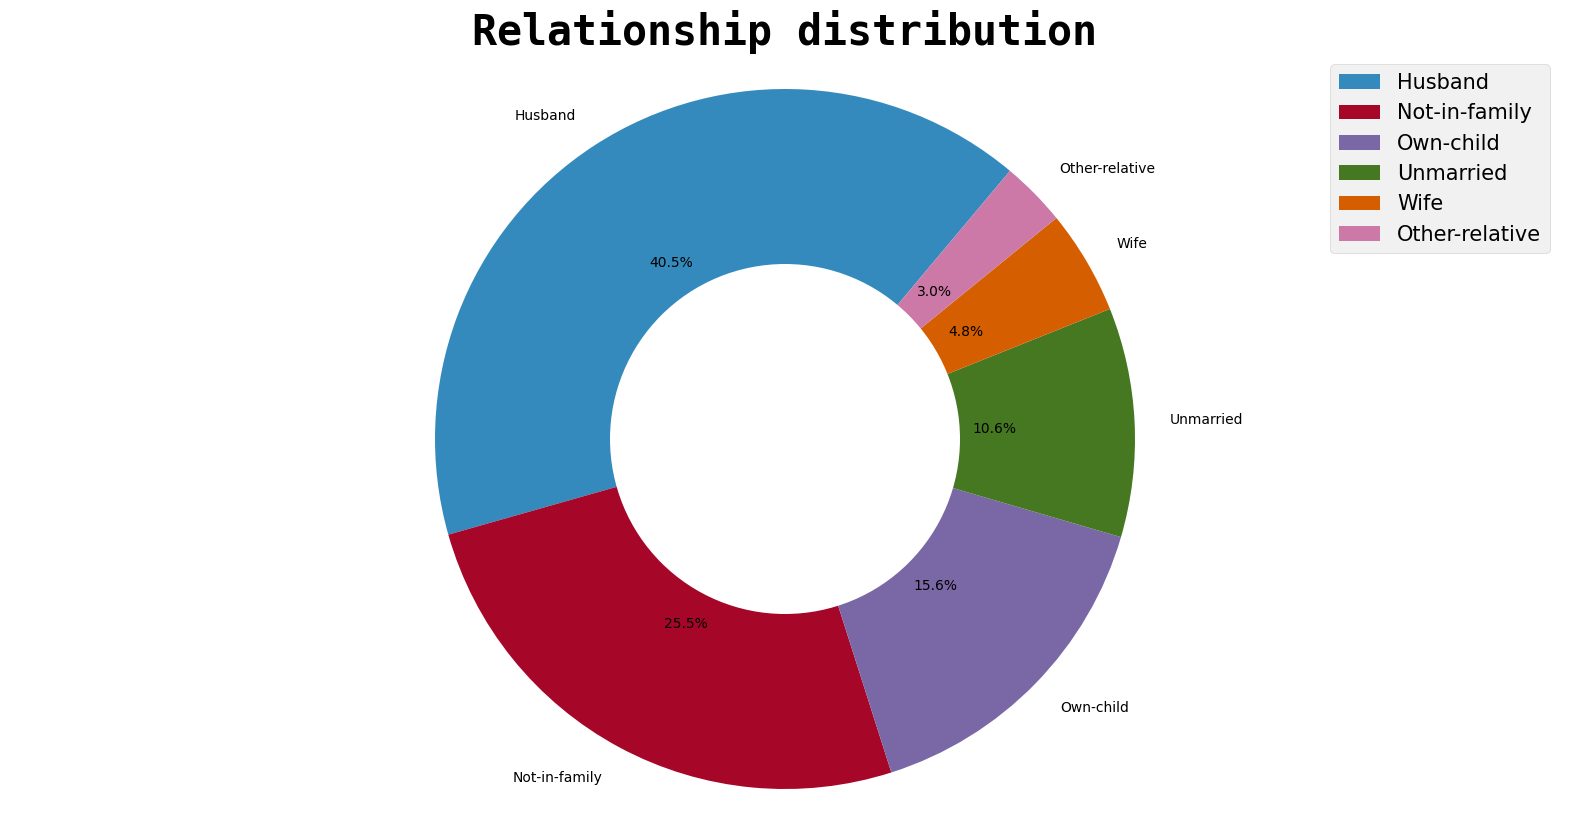

In [22]:

# Creating a donut chart for 'Relationship'
relation = df['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [23]:
df['native.country'].value_counts()

native.country
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

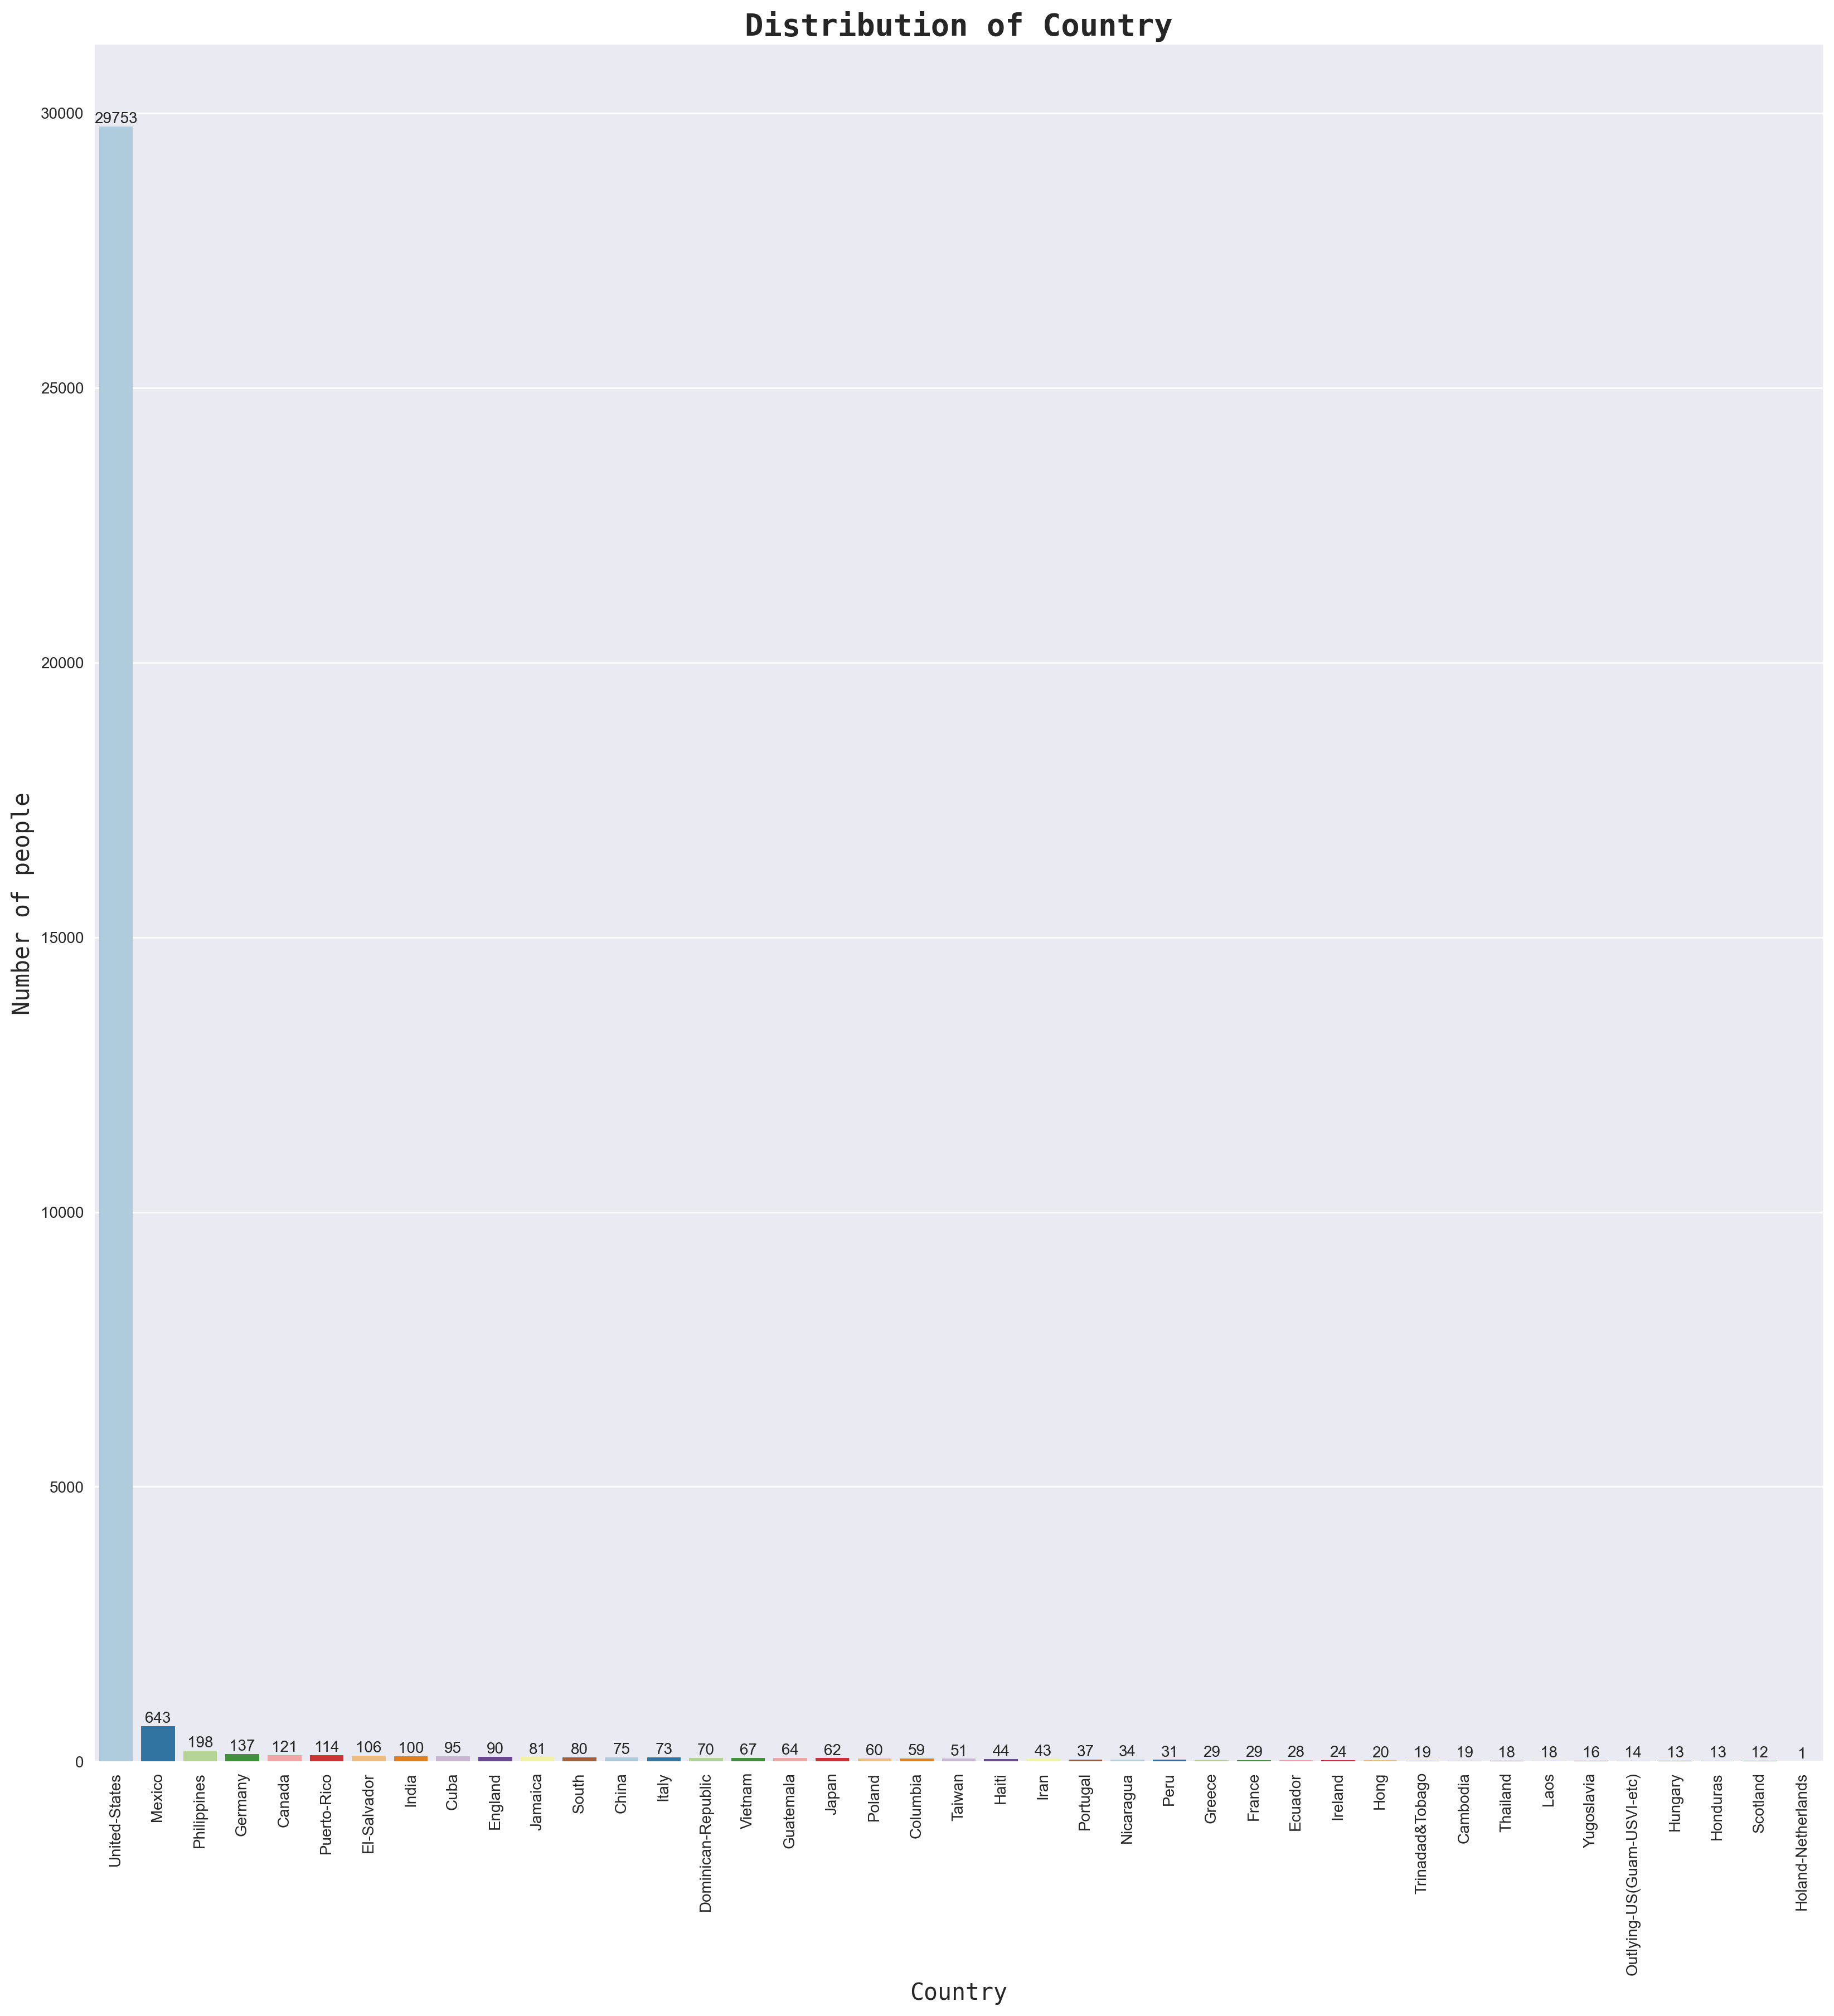

In [24]:
#Creating distribution of Country


Country =df['native.country'].value_counts()


plt.figure(figsize =(20,20),dpi = 200)
plt.style.use('seaborn')
counts = df['native.country'].value_counts().values

sns.barplot(data = df,y = Country.values,x = Country.index, palette = 'Paired')
for i, count in enumerate(counts):
    plt.annotate(count, xy=(i, count), ha='center', va='bottom')

plt.title('Distribution of Country', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Country', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xticks(rotation = 90)
plt.show();


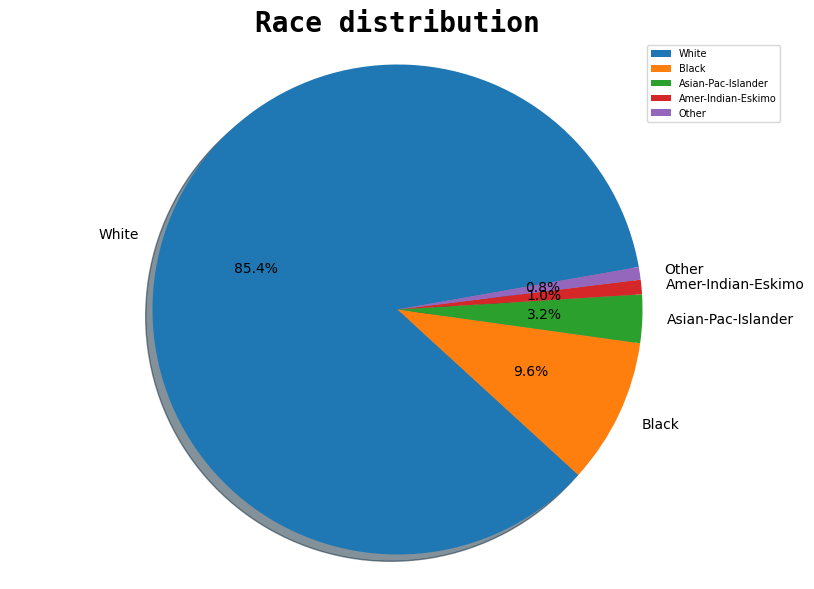

In [25]:
#creating distributions of race 
race= df['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(race.values, labels=race.index, startangle=10, shadow=True, autopct='%1.1f%%')

plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

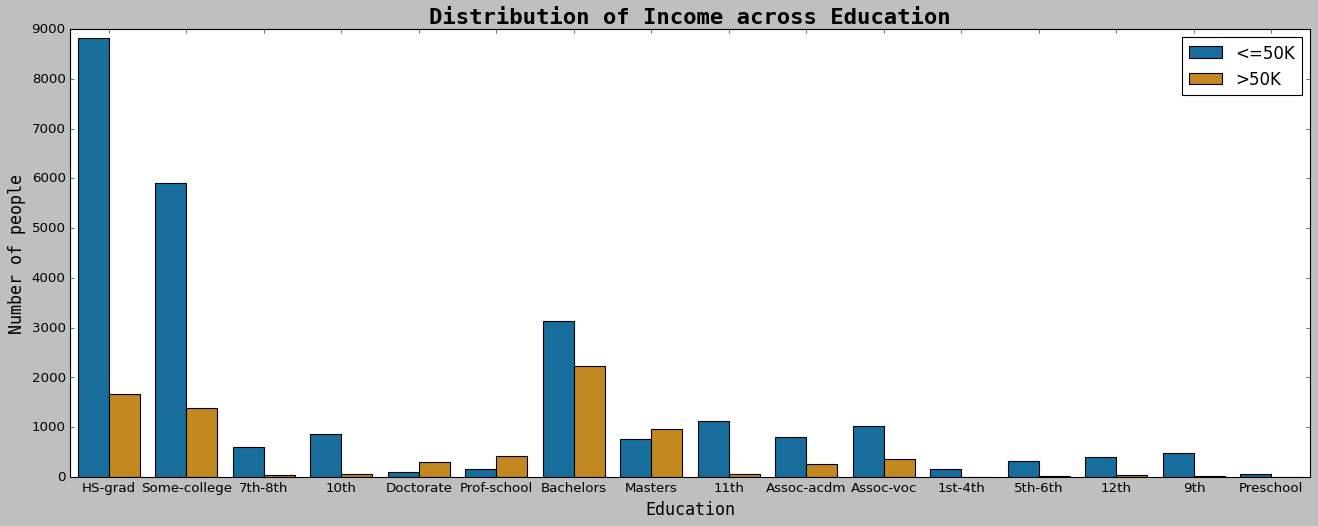

In [27]:
# Creating a countplot of income across education
plt.style.use('classic')
plt.figure(figsize=(20, 7))
sns.countplot(data = df,x=df['education'],
              hue=df['income'], palette='colorblind')


plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

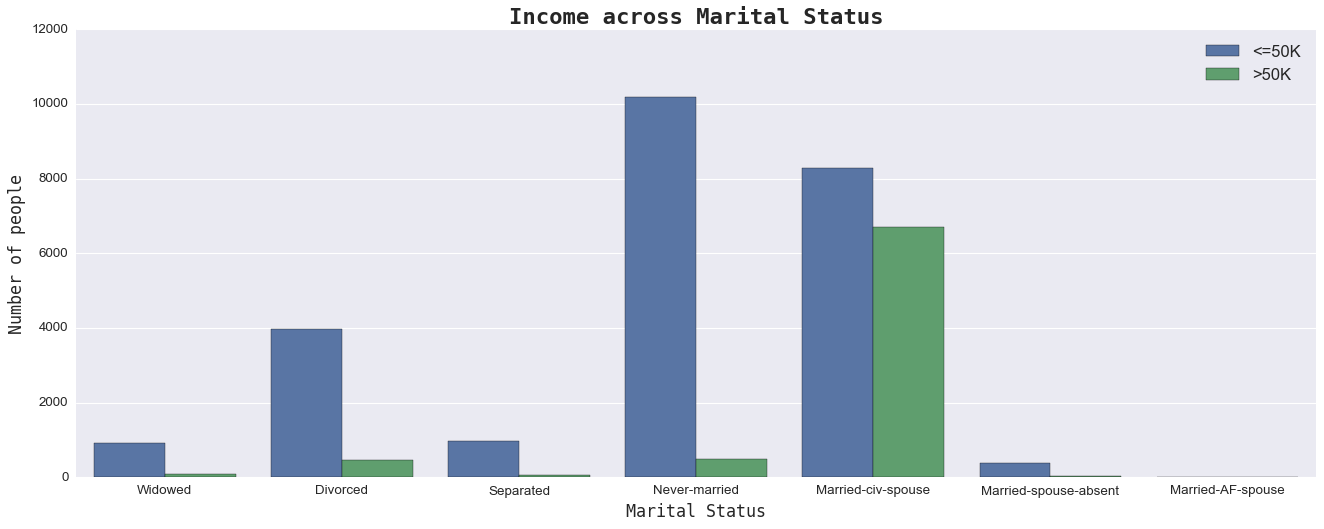

In [28]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(data = df,x =df['marital.status'], hue=dataset['income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


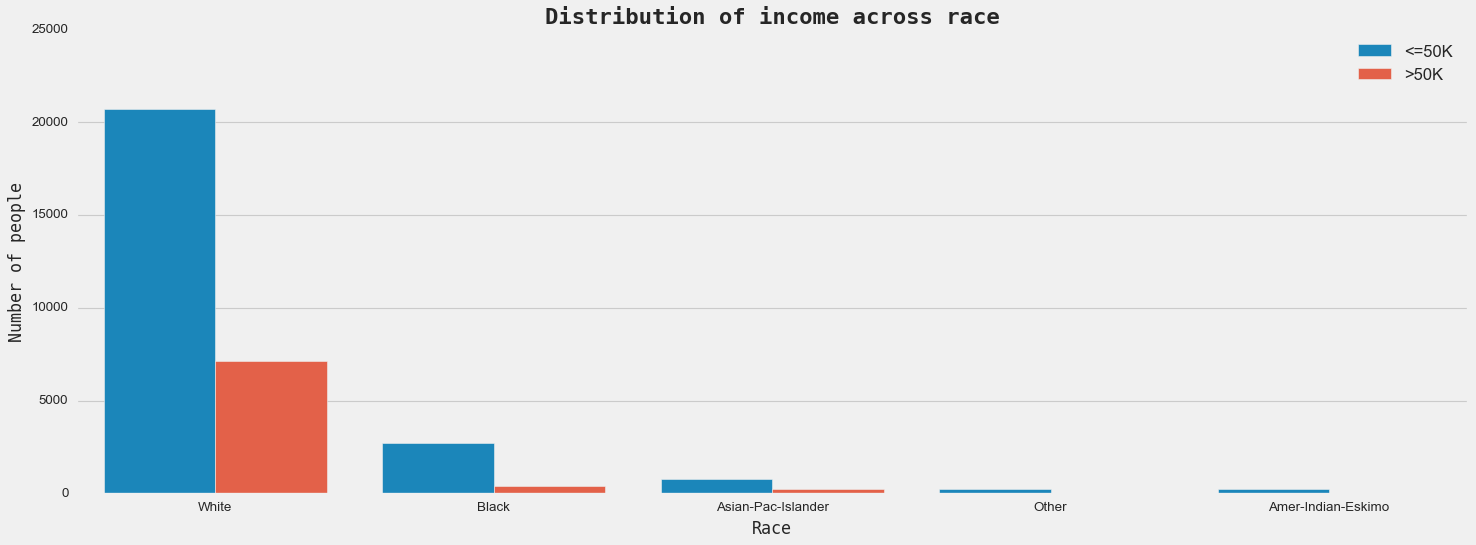

In [29]:

# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(data = df,x = df['race'], hue=dataset['income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()



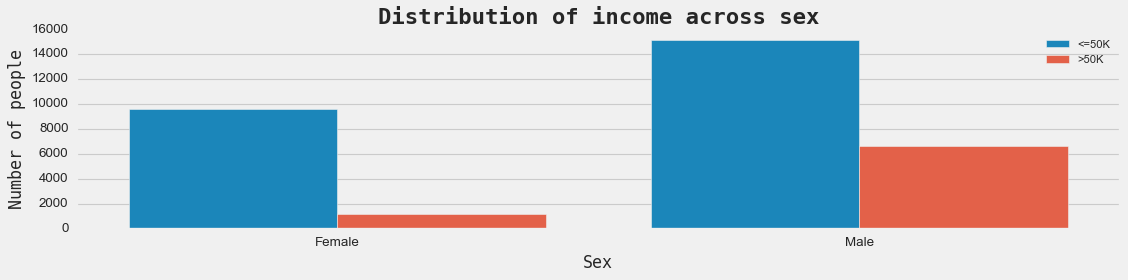

In [30]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 3))
sns.countplot(data = df,x =df['sex'], hue=dataset['income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

# Machine Learning Algorithms

In [32]:
X = df.drop('income', axis = 1)
y = df['income']

In [33]:
df.shape

(32561, 15)

In [34]:
#Train Test Split 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 101)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [37]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=101)

In [38]:
ros.fit(X, y)

RandomOverSampler(random_state=101)

In [39]:
X_resampled, Y_resampled = ros.fit_resample(X, y)

In [42]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

income
0    50.0 %
1    50.0 %
Name: proportion, dtype: object

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=101)

Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
multi_class = ['auto','over','multinomial']
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

param_dist = {
    'C': C,
    'penalty': penalty,
    'solver': solver,
    'multi_class': multi_class
}

lr = LogisticRegression(random_state = 101)

from sklearn.model_selection import RandomizedSearchCV

random_search_lr = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=10, cv=5, random_state=101)
random_search_lr.fit(X_train, y_train)



RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=101),
                   param_distributions={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                                        'multi_class': ['auto', 'over',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=101)

In [45]:
# Print the best parameters and best score
print("Best Parameters:", random_search_lr.best_params_)
print("Best Score:", random_search_lr.best_score_)

Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'auto', 'C': 21.544346900318832}
Best Score: 0.7694678743499306


In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

y_pred_lr = random_search_lr.predict(X_test)




In [47]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4955
           1       0.77      0.76      0.77      4933

    accuracy                           0.77      9888
   macro avg       0.77      0.77      0.77      9888
weighted avg       0.77      0.77      0.77      9888



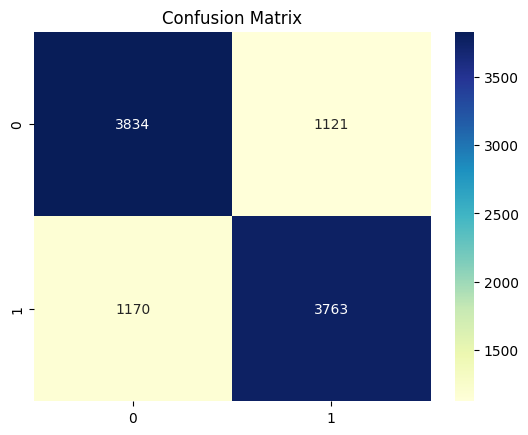

In [48]:
plt.style.use('default')
cm = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.show()

In [49]:
accuracy_score(y_test,y_pred_lr)*100

76.83050161812298

In [50]:
f1_score(y_test,y_pred_lr)*100

76.66293164918

K Nearest Neighbours

In [51]:

from sklearn.neighbors import KNeighborsClassifier
n_neighbors= [5,10,15,20]
algorithm = ['auto','ball_tree', 'kd_tree', 'brute']

param_dist = {
    'n_neighbors': n_neighbors,
    'algorithm': algorithm
}

KNN = KNeighborsClassifier()

from sklearn.model_selection import RandomizedSearchCV

random_search_KNN = RandomizedSearchCV(KNN, param_distributions=param_dist, n_iter=10, cv=5, random_state=101)
random_search_KNN.fit(X_train, y_train)



RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [5, 10, 15, 20]},
                   random_state=101)

In [52]:
# Print the best parameters and best score
print("Best Parameters:", random_search_KNN.best_params_)
print("Best Score:", random_search_KNN.best_score_)


Best Parameters: {'n_neighbors': 5, 'algorithm': 'auto'}
Best Score: 0.7094964923458686


In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

y_pred_KNN = random_search_KNN.predict(X_test)



In [54]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.77      0.65      0.70      4955
           1       0.69      0.80      0.75      4933

    accuracy                           0.73      9888
   macro avg       0.73      0.73      0.72      9888
weighted avg       0.73      0.73      0.72      9888



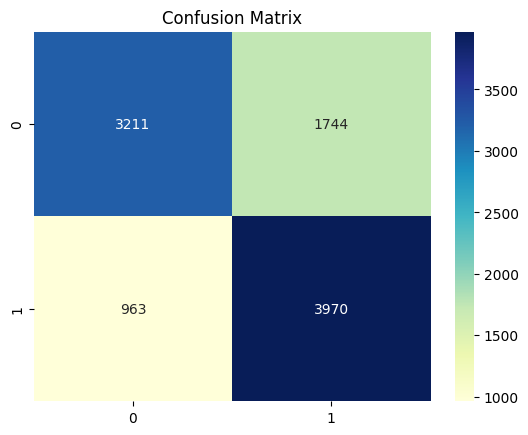

In [55]:
plt.style.use('default')
cm = confusion_matrix(y_test,y_pred_KNN)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.show()

In [56]:
accuracy_score(y_test,y_pred_KNN)*100


72.62338187702265

In [57]:
f1_score(y_test,y_pred_KNN)*100

74.57499765192073

Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [283]:
#help(DecisionTreeClassifier)

In [71]:
criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = np.arange(0, 11)
max_features = ["auto", "sqrt", "log2"]
param_dist = {
    'criterion': criterion,
    'splitter': splitter,
    'max_depth':max_depth,
    'max_features': max_features
}

DT = DecisionTreeClassifier(random_state = 101)

from sklearn.model_selection import RandomizedSearchCV

random_search_dt = RandomizedSearchCV(DT, param_distributions=param_dist, n_iter=10, cv=5, random_state=101)
random_search_dt.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'splitter': ['best', 'random']},
                   random_state=101)

In [72]:
# Print the best parameters and best score
print("Best Parameters:", random_search_dt.best_params_)
print("Best Score:", random_search_dt.best_score_)

Best Parameters: {'splitter': 'best', 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}
Best Score: 0.8196803823062544


In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

y_pred_dt = random_search_dt.predict(X_test)

In [74]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80      4955
           1       0.78      0.89      0.83      4933

    accuracy                           0.82      9888
   macro avg       0.82      0.82      0.82      9888
weighted avg       0.82      0.82      0.82      9888



In [75]:
confusion_matrix(y_test,y_pred_dt)

array([[3697, 1258],
       [ 553, 4380]], dtype=int64)

In [76]:
accuracy_score(y_test,y_pred_dt)*100

81.68487055016182

In [77]:
f1_score(y_test,y_pred_dt)*100

82.86822438747517

Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier


In [1]:
#help(RandomForestClassifier)


In [62]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]
criterion = ["gini", "entropy", "log_loss"]
max_features = ["sqrt", "log2"]

param_dist = {
    'criterion': criterion,
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'max_features': max_features
}

RF = RandomForestClassifier(random_state = 101)

from sklearn.model_selection import RandomizedSearchCV

random_search_rf = RandomizedSearchCV(RF, param_distributions=param_dist, n_iter=10, cv=5, random_state=101)
random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=101)

In [63]:
# Print the best parameters and best score
print("Best Parameters:", random_search_rf.best_params_)
print("Best Score:", random_search_rf.best_score_)

Best Parameters: {'n_estimators': 142, 'max_features': 'sqrt', 'max_depth': 55, 'criterion': 'log_loss'}
Best Score: 0.917602170544271


In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

y_pred_rf = random_search_rf.predict(X_test)

In [65]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      4955
           1       0.90      0.98      0.94      4933

    accuracy                           0.93      9888
   macro avg       0.94      0.93      0.93      9888
weighted avg       0.94      0.93      0.93      9888



In [66]:
confusion_matrix(y_test,y_pred_rf)

array([[4404,  551],
       [ 108, 4825]], dtype=int64)

In [67]:
accuracy_score(y_test,y_pred_rf)*100

93.33535598705501

In [68]:
f1_score(y_test,y_pred_rf)*100

93.60752740323989

AdaBoost Classifier

In [78]:
from sklearn.ensemble import AdaBoostClassifier

In [307]:
#help(AdaBoostClassifier)

In [79]:
learning_rate = [0.1,0.5,1]
algorithm = ['SAMME', 'SAMME.R']
n_estimators= [50,100,150,200]


param_dist = {
    'learning_rate': learning_rate,
    'n_estimators': n_estimators,
    'algorithm': algorithm
}

AD = AdaBoostClassifier(random_state = 101)

from sklearn.model_selection import RandomizedSearchCV

random_search_ad = RandomizedSearchCV(AD,param_distributions=param_dist, n_iter=10, cv=5, random_state=101)
random_search_ad.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=101),
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.1, 0.5, 1],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=101)

In [80]:
# Print the best parameters and best score
print("Best Parameters:", random_search_ad.best_params_)
print("Best Score:", random_search_ad.best_score_)

Best Parameters: {'n_estimators': 100, 'learning_rate': 1, 'algorithm': 'SAMME.R'}
Best Score: 0.8351789831278793


In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

y_pred_ad = random_search_ad.predict(X_test)

In [82]:
print(classification_report(y_test,y_pred_ad))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      4955
           1       0.82      0.85      0.84      4933

    accuracy                           0.83      9888
   macro avg       0.83      0.83      0.83      9888
weighted avg       0.83      0.83      0.83      9888



In [83]:
confusion_matrix(y_test,y_pred_ad)

array([[4050,  905],
       [ 739, 4194]], dtype=int64)

In [84]:
accuracy_score(y_test,y_pred_ad)*100

83.37378640776699

In [85]:
f1_score(y_test,y_pred_ad)*100

83.61244019138756

# A hyperparameter tuned random forest classifier gives the highest accuracy score of 93.33 and f1 score of 93.60